In [299]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [300]:
train=pd.read_csv('Logistic Regression/train.csv',header=None)

In [301]:
test=pd.read_csv('Logistic Regression/test.csv',header=None)

In [302]:
xtest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1,0,0,-2,-1,0,0,0,-2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-1,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,-2,0,0,0,0,0
4,0,0,0,-2,-1,0,0,0,0,0,0,0,0,0


In [303]:
from sklearn.preprocessing import LabelEncoder

In [304]:
enc=LabelEncoder()
train.iloc[:,1]=enc.fit_transform(train.iloc[:,1])
test.iloc[:,1]=enc.transform(test.iloc[:,1])
train.iloc[:,3]=enc.fit_transform(train.iloc[:,3])
test.iloc[:,3]=enc.transform(test.iloc[:,3])
train.iloc[:,5]=enc.fit_transform(train.iloc[:,5])
test.iloc[:,5]=enc.transform(test.iloc[:,5])
train.iloc[:,6]=enc.fit_transform(train.iloc[:,6])
test.iloc[:,6]=enc.transform(test.iloc[:,6])
train.iloc[:,7]=enc.fit_transform(train.iloc[:,7])
test.iloc[:,7]=enc.transform(test.iloc[:,7])
train.iloc[:,8]=enc.fit_transform(train.iloc[:,8])
test.iloc[:,8]=enc.transform(test.iloc[:,8])
train.iloc[:,9]=enc.fit_transform(train.iloc[:,9])
test.iloc[:,9]=enc.transform(test.iloc[:,9])
train.iloc[:,13]=enc.fit_transform(train.iloc[:,13])
test.iloc[:,13]=enc.transform(test.iloc[:,13])
train.iloc[:,14]=enc.fit_transform(train.iloc[:,14])
test.iloc[:,14]=enc.fit_transform(test.iloc[:,14])

In [305]:
xtrain=train.iloc[:,0:14]
ytrain=train.iloc[:,14]
xtest=test.iloc[:,0:14]
ytest=test.iloc[:,14]

In [306]:
xtrain[0][0]

39

# normalising the data

In [307]:
desc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [308]:
desc[0]

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: 0, dtype: float64

In [309]:
desc=xtrain.describe()
for i in range(14):
    m=desc[i][1]
    s=desc[i][2]                                 #scaling train data
    for j in range(len(xtrain)):
        xtrain[i][j]=(xtrain[i][j]-m)/s
        

In [310]:
desc2=xtest.describe()
for i in range(14):
    m=desc[i][1]                   #scaling test data
    s=desc[i][2]
    for j in range(len(xtest)):
        xtest[i][j]=(xtest[i][j]-m)/s

In [311]:
class logreg:
    def __init__(self,typ, lrate=0.01, num_iter=10000, fit_b=True):
        self.lr = lrate
        self.num_iter = num_iter
        self.fit_b = fit_b
        self.type=typ
    
    def __add_intercept(self, x):
        b = np.ones((x.shape[0], 1))
        return np.concatenate((b, x), axis=1)
    
    def __sigmoid(self, m,x):
        return 1 / (1 + np.exp(-np.dot(m,x)))
    
    def __sigmoidl1(self, m,x):
        return (1 / (1 + np.exp(-np.dot(m,x))) ) + abs(m.mean())      # l1 regularization
    
    def __sigmoidl2(self, m,x):
        return 1 / (1 + np.exp(-np.dot(m,x))) + (m.mean())**2       #l2 regularization
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, x, y):
        if self.fit_b:
            x = self.__add_intercept(x)
        
        self.m = np.zeros(x.shape[1])
        loss=[]
        for i in range(self.num_iter):
            if(self.type=='nrml'):
                h = self.__sigmoid(x, self.m)
            elif(self.type=='l1'):
                h = self.__sigmoidl1(x, self.m)
            elif(self.type=='l2'):
                h = self.__sigmoidl2(x, self.m)
            gradient = np.dot(x.T, (h - y)) / y.size
            self.m -= self.lr * gradient
            loss.append(self.__loss(h,y))
            if(i % 1000 == 0):
                if(self.type=='nrml'):
                    h = self.__sigmoid(x, self.m)
                elif(self.type=='l1'):
                    h = self.__sigmoidl1(x, self.m)
                elif(self.type=='l2'):
                    h = self.__sigmoidl2(x, self.m)
                print(f'loss: {self.__loss(h, y)} \t')
        plt.plot([i for i in range(len(loss))],loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
    def predict_prob(self, x):
        if self.fit_b:
            x = self.__add_intercept(x)
    
        return self.__sigmoid(x, self.m)
    
    def predict(self, x, threshold=0.5):
        return self.predict_prob(x) >= threshold


loss: 0.6920593911152333 	
loss: 0.4718875575253174 	
loss: 0.4491039787183019 	
loss: 0.4399361993534688 	
loss: 0.43482033676960047 	
loss: 0.4314590156077088 	
loss: 0.42903310371859177 	
loss: 0.42717833183755377 	
loss: 0.4257058853848301 	
loss: 0.42450614883838994 	


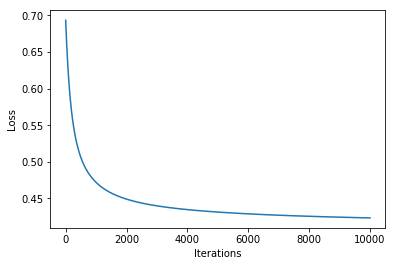

0.7955511288180611

In [312]:
clf=logreg(typ='nrml')

clf.fit(xtrain,ytrain)            #normal logistic regression analysis

preds = clf.predict(xtest)
# accuracy normal
(preds == ytest).mean()

In [313]:
(clf.predict(xtrain) == ytrain).mean()      #accuracy on train data

0.7958689742059545

loss: 0.7618290729104406 	


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


loss: 0.4821719590099346 	
loss: 0.4598671875728257 	
loss: 0.45140440768641243 	
loss: 0.44703851610895484 	
loss: 0.44380555320488635 	
loss: 0.44155976041696454 	
loss: 0.44035446751694846 	
loss: 0.43933788316792743 	
loss: 0.4390231619039337 	


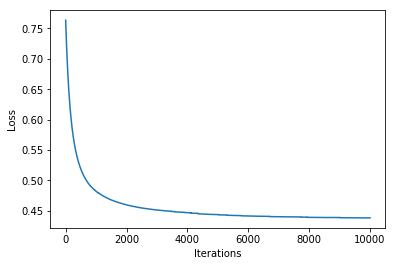

0.7916998671978752

In [314]:
clf2=logreg(typ='l1')
clf2.fit(xtrain,ytrain)
preds = clf2.predict(xtest)      #l1 regularized log reg analysis
# accuracy l1
(preds == ytest).mean()

In [315]:
(clf2.predict(xtrain) == ytrain).mean()     #accuracy on train data

0.7912936807903985

loss: 0.6959158563454614 	
loss: 0.47237870644499136 	


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


loss: 0.449956184627613 	
loss: 0.442054853254005 	
loss: 0.43726864524822173 	
loss: 0.43396849889625966 	
loss: 0.43155277052831564 	
loss: 0.4296994232031968 	
loss: 0.4282347603598283 	
loss: 0.4270552375711523 	


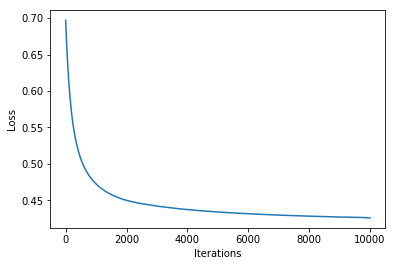

0.7939575033200531

In [316]:
clf3=logreg(typ='l2')
clf3.fit(xtrain,ytrain)
preds = clf3.predict(xtest)            #l2 regularized log reg analysis
# accuracy l2
(preds == ytest).mean()

In [317]:
(clf3.predict(xtrain) == ytrain).mean()    #accuracy on train data

0.7942775678005437